In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer




In [3]:
# Load the data
data = pd.read_csv("/content/Credit_card.csv")
labels = pd.read_csv("/content/Credit_card_label.csv")

In [4]:
# Merge datasets
merged_data = pd.merge(data, labels, on="Ind_ID")

In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [6]:
merged_data['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

In [7]:
merged_data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [8]:
#Handling missing values
# Instantiate the imputer for numeric columns (e.g., mean imputation)
numeric_imputer = SimpleImputer(strategy='mean')

# Impute missing values for numeric columns in the merged dataset
merged_data[['Annual_income', 'Birthday_count']] = numeric_imputer.fit_transform(merged_data[['Annual_income', 'Birthday_count']])



In [9]:
merged_data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [10]:
# Drop unnecessary columns
merged_data.drop(['Ind_ID', 'EMAIL_ID'], axis=1, inplace=True)

In [11]:
# Handle categorical variables
merged_data = pd.get_dummies(merged_data, columns=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'])

In [12]:
# Split the data into features and target variable
X = merged_data.drop('label', axis=1)
y = merged_data['label']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

CHILDREN  Annual_income  Birthday_count  Employed_days  Mobile_phone  \
680          0       202500.0   -21126.000000         365243             1   
1079         2       157500.0   -13979.000000          -1626             1   
1190         1       405000.0   -16962.000000           -407             1   
864          0       180000.0   -20577.000000         365243             1   
743          0       135000.0   -16040.342071           -645             1   
...        ...            ...             ...            ...           ...   
1130         0       315000.0   -16188.000000           -309             1   
1294         1       202500.0   -10218.000000           -313             1   
860          2       112500.0   -13095.000000           -217             1   
1459         0       171000.0   -18348.000000          -3853             1   
1126         0       112500.0   -10101.000000           -505             1   

      Work_Phone  Phone  Family_Members  GENDER_F  GENDER_M  ...  \
680            0      0               1         1         0  ...   
1079           0      0               3         0         1  ...   
1190           0      1               3         1         0  ...   
864            0      0               1         1         0  ...   
743            1      0               2         1         0  ...   
...          ...    ...             ...       ...       ...  ...   
1130           1      1               2         1         0  ...   
1294           1      0               3         0         1  ...   
860            0      1               4         0         1  ...   
1459           0      0               2         1         0  ...   
1126           1      1               2         1         0  ...   

      Type_Occupation_Laborers  Type_Occupation_Low-skill Laborers  \
680                          0                                   0   
1079                         1                                   0   
1190                         1                                   0   
864                          0                                   0   
743                          1                                   0   
...                        ...                                 ...   
1130                         0                                   0   
1294                         0                                   0   
860                          1                                   0   
1459                         0                                   0   
1126                         1                                   0   

      Type_Occupation_Managers  Type_Occupation_Medicine staff  \
680                          0                               0   
1079                         0                               0   
1190                         0                               0   
864                          0                               0   
743                          0                               0   
...                        ...                             ...   
1130                         0                               0   
1294                         0                               0   
860                          0                               0   
1459                         0                               0   
1126                         0                               0   

      Type_Occupation_Private service staff  Type_Occupation_Realty agents  \
680                                       0                              0   
1079                                      0                              0   
1190                                      0                              0   
864                                       0                              0   
743                                       0                              0   
...                                     ...                            ...   
1130                                      0                             

In [15]:
X_test

CHILDREN  Annual_income  Birthday_count  Employed_days  Mobile_phone  \
30           0        90000.0        -12026.0          -4770             1   
1514         0        69750.0        -21986.0         365243             1   
1182         2        81000.0        -15373.0          -2333             1   
1205         0       112500.0        -23018.0         365243             1   
528          0       225000.0        -10570.0          -1175             1   
...        ...            ...             ...            ...           ...   
1228         0       306000.0        -18927.0          -2978             1   
1065         0       112500.0        -21719.0         365243             1   
1345         0       225000.0        -10177.0           -189             1   
485          1       157500.0        -14510.0          -3805             1   
874          0       157500.0        -15035.0          -1128             1   

      Work_Phone  Phone  Family_Members  GENDER_F  GENDER_M  ...  \
30             0      0               2         1         0  ...   
1514           0      1               1         1         0  ...   
1182           0      0               3         1         0  ...   
1205           0      0               1         1         0  ...   
528            0      0               2         0         1  ...   
...          ...    ...             ...       ...       ...  ...   
1228           0      0               2         1         0  ...   
1065           0      1               2         0         1  ...   
1345           0      0               1         0         1  ...   
485            0      0               3         1         0  ...   
874            0      1               2         1         0  ...   

      Type_Occupation_Laborers  Type_Occupation_Low-skill Laborers  \
30                           0                                   0   
1514                         0                                   0   
1182                         0                                   0   
1205                         0                                   0   
528                          0                                   0   
...                        ...                                 ...   
1228                         0                                   0   
1065                         0                                   0   
1345                         0                                   0   
485                          0                                   0   
874                          0                                   0   

      Type_Occupation_Managers  Type_Occupation_Medicine staff  \
30                           0                               0   
1514                         0                               0   
1182                         0                               0   
1205                         0                               0   
528                          1                               0   
...                        ...                             ...   
1228                         0                               0   
1065                         0                               0   
1345                         1                               0   
485                          0                               0   
874                          0                               0   

      Type_Occupation_Private service staff  Type_Occupation_Realty agents  \
30                                        0                              0   
1514                                      0                              0   
1182                                      0                              0   
1205                                      0                              0   
528                                       0                              0   
...                                     ...                            ...   
1228                                      0                             

In [16]:
y_train

680     0
1079    0
1190    0
864     0
743     0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: label, Length: 1238, dtype: int64

In [17]:
y_test

30      1
1514    0
1182    0
1205    0
528     0
       ..
1228    0
1065    0
1345    0
485     0
874     0
Name: label, Length: 310, dtype: int64

In [18]:
#Performing linear regression
from sklearn.linear_model import LinearRegression
lnr_r=LinearRegression()
lnr_r.fit(X_train,y_train)


LinearRegression()

In [19]:
y_pred=lnr_r.predict(X_train)

In [20]:
y_pred

array([0.09791754, 0.12533584, 0.01579462, ..., 0.10351356, 0.06198028,
       0.07835553])

In [21]:
y_test

30      1
1514    0
1182    0
1205    0
528     0
       ..
1228    0
1065    0
1345    0
485     0
874     0
Name: label, Length: 310, dtype: int64

In [22]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Predictions
y_pred = rf_model.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [27]:
# Display results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.9354838709677419
Confusion Matrix:
[[280   0]
 [ 20  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       280
           1       1.00      0.33      0.50        30

    accuracy                           0.94       310
   macro avg       0.97      0.67      0.73       310
weighted avg       0.94      0.94      0.92       310



In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [29]:
# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier()
}

In [30]:
# Evaluate each model and store accuracy
model_accuracies = {}

In [31]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

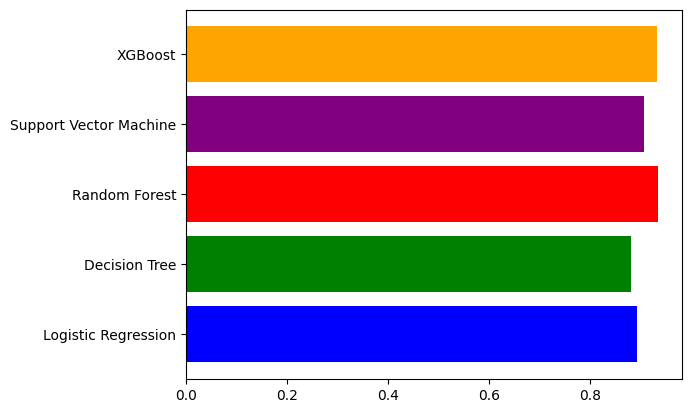

In [32]:
# Create a horizontal bar chart
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel


In [33]:
#comparing all the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier()
}

In [34]:
#sql (using merged_data)

In [35]:
# Load the data
data = pd.read_csv("/content/Credit_card.csv")
labels = pd.read_csv("/content/Credit_card_label.csv")
# Merge datasets
merged_data2 = pd.merge(data, labels, on="Ind_ID")

In [36]:
import duckdb
conn=duckdb.connect()

In [37]:
conn.register('df',merged_data2)

In [38]:
conn.execute("select * from df").fetchdf()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0            None   
1                1           1      1         0            None   
2                1           1      1         0            None   
3                1           1      1         0            None   
4                1           1      1         0            None   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0            None   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

In [39]:
#1)Group the customers based on their income type and find the average of their annual income.

In [40]:
conn.execute("select Type_Income,avg(Annual_income) from df group by Type_Income").fetchdf()

Type_Income  avg(Annual_income)
0             Pensioner       155175.096226
1               Working       181048.757306
2         State servant       211422.413793
3  Commercial associate       234600.000000

In [41]:
#2)Find the female owners of cars and property.

In [42]:
conn.execute("select count(ind_id)as total_females from df where gender='F' and Car_Owner='Y' and Propert_Owner='Y'").fetchdf()

total_females
0            177

In [43]:
#3)Find the male customers who are staying with their families.

In [44]:
conn.execute("select ind_id as male_customers from df where gender='M' and Housing_type='With parents'" ).fetchdf()

male_customers
0          5021303
1          5079166
2          5079167
3          5079168
4          5050729
5          5028383
6          5143019
7          5067982
8          5143573
9          5038751
10         5010203
11         5058267
12         5024352
13         5150038
14         5113302
15         5126311
16         5126751
17         5037125
18         5054414
19         5145694
20         5146429
21         5054407
22         5068648
23         5143560
24         5125542
25         5142781
26         5024592
27         5094884
28         5033496
29         5067203
30         5045537
31         5009269
32         5069007
33         5066915
34         5143025
35         5010202
36         5028612

In [45]:
#4)Please list the top five people having the highest income.

In [46]:
conn.execute("select ind_id from df order by Annual_income desc limit 5").fetchdf()

Ind_ID
0  5143231
1  5143235
2  5090470
3  5079016
4  5079017

In [47]:
#5)How many married people are having bad credit?

In [48]:
conn.execute("select count(ind_id)as married_people from df where Marital_status='Married' and label=1").fetchdf()

married_people
0             114

In [49]:
#6)What is the highest education level and what is the total count?

In [50]:
conn.execute("select EDUCATION,count(*) AS total_count from df where EDUCATION='Higher education' group by EDUCATION  ORDER BY total_count desc limit 1 ").fetchdf()

EDUCATION  total_count
0  Higher education          426

In [51]:
#7)Between married males and females, who is having more bad credit?

In [52]:
conn.execute("select Marital_status,GENDER,count(*) as bad_creed_count from df where Marital_status='Married' and label=1 group by Marital_status,GENDER").fetchdf()

Marital_status GENDER  bad_creed_count
0        Married   None                4
1        Married      M               51
2        Married      F               59